# Telematics Data Analytics

    This notebook is for Internship at Xen.AI. The aim is to apply AI/ML on truck data to reduce the downtime/maintenance time by predicting Engine Health Score (EHS).
    We have to generate an equation and perform time series prediction for the EHS using available data.

    Data Credits  : Dr. Dmitry

In [1]:
import warnings                         #'do not disturb' mode
warnings.filterwarnings('ignore')

import numpy as np                      # vectors and matrices
import pandas as pd                     # tables and data manipulations
import matplotlib.pyplot as plt         # plots
import seaborn as sns                   # more plots

%matplotlib inline

In [2]:
# data = pd.read_csv('telematics_data.csv')   # data importing

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_path='/content/drive/My Drive/Xen.AI/'

In [5]:
data = pd.read_csv('/content/drive/My Drive/Xen.AI/telematics_data.csv')   # data importing

In [6]:
pd.options.display.max_rows = 200
pd.options.display.max_columns =50     #to show max rows and columns

In [7]:
data.head()

,year,month,day,vin,wmi,engine_cd,device_type,msg_ts,vin_utc_key,packet_id,reason_code,script_version,deviceid,latitude,longitude,driveridcode1,obdvin,vehiclebattvolts,fuel_total,engine_rpm,coolant_tmp,fuel_lvl_pct,driving_tme_sec,cruise_tme_sec,idle_tme_sec,idle_fuel_total,pto_tme_total,pto_fuel_total,gear,fuel_tmp,oil_tmpl,throt_pos,mpg,acel_pos,engine_pct_load,torque,oil_lvl,oil_psi,coolant_psi,intak_air_tmp,manifold_tmp,vehiclespeed,heading,odometerinmeters,odometer
0,2020,4,18,3HSDZTZR9KN352697,3HS,TZ,Xirgo,2020-04-18 06:50:40,3HSDZTZR9KN3526972020-04-18 06:50:40,36,9,204.0,173101817,38.799149,-90.603680,0.0,3HSDZTZR9KN352697,14.2,106165.0,1144.0,79.0,41.0,NaN,NaN,2167380.0,1503.0,0.0,0.0,1.0,0.0,76.0,0.0,NaN,0.0,11.0,12.0,0.0,340.0,0.0,4.0,10.0,1005.0,960.0,380663000.0,380663.0
1,2020,5,20,3HSDZTZR9LN055320,3HS,TZ,Xirgo,2020-05-20 03:01:09,3HSDZTZR9LN0553202020-05-20 03:01:09,36,9,204.0,172301945,33.618963,-84.333847,0.0,3HSDZTZR9LN055320,NaN,NaN,584.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,56.0,1.0,NaN,0.0,26.0,11.0,0.0,228.0,0.0,24.0,NaN,11.0,700.0,88781990.0,NaN
2,2020,4,1,3HSDZTZR0KN354211,3HS,TZ,Xirgo,2020-04-01 20:02:39,3HSDZTZR0KN3542112020-04-01 20:02:39,36,9,204.0,173511306,41.139005,-101.173123,0.0,3HSDZTZR0KN354211,NaN,113134.0,1145.0,81.0,NaN,NaN,NaN,1788120.0,1172.0,NaN,0.0,1.0,0.0,NaN,0.0,NaN,NaN,41.0,42.0,NaN,320.0,0.0,25.0,NaN,NaN,2709.0,416436440.0,NaN
3,2020,5,5,3HSDWTZR8LN845362,3HS,TZ,Xirgo,2020-05-05 06:17:36,3HSDWTZR8LN8453622020-05-05 06:17:36,36,9,204.0,173404340,38.856184,-98.139251,0.0,3HSDWTZR8LN845362,14.0,149410.0,1368.0,81.0,54.0,NaN,NaN,786600.0,497.0,0.0,0.0,1.0,0.0,86.0,0.0,NaN,0.0,19.0,19.0,0.0,424.0,0.0,13.0,30.0,1095.0,838.0,426460520.0,NaN
4,2020,4,7,3HSDZTZRXLN085409,3HS,TZ,N2,2020-04-07 20:14:07,3HSDZTZRXLN0854092020-04-07 20:14:07,36,9,204.0,190815-0009,33.351086,-87.017387,0.0,3HSDZTZRXLN085409,14.1,33886.0,1167.0,82.0,NaN,4755420.0,NaN,NaN,504.0,0.0,0.0,1.0,NaN,88.0,0.0,NaN,NaN,65.0,67.0,NaN,320.0,NaN,NaN,NaN,1090.0,458.0,107975440.0,NaN


In [8]:
# data.info()

In [9]:
# data.describe().T

In [10]:
# data.isnull().sum()/len(data) * 100   #percentage of missing values

In [11]:
print('Total rows = {} \n'.format(len(data)))

for i in data.columns:   #lets see value counts in each column, print value & count if unique value < 106 (105 in deviceid)
    
    print('{}'.format(i))
    
    if len(data[i].value_counts())<106:
        print(data[i].value_counts())
        
    else:
        print("{} has More than 106 values".format(i))
        
    print('Number of values =', data[i].nunique())   #Unique values
    print('Percentage of Missing values = %.2f'%(data[i].isnull().sum()/len(data) * 100), '%')  #Missing value percentage
    print('Percentage of Zero = %.2f'%(np.shape(np.where(data[i]==0))[1] / len(data) * 100), '%', '\n') #percetnage of 0

Total rows = 514994 

year
2020    514994
Name: year, dtype: int64
Number of values = 1
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

month
4    299339
5    215655
Name: month, dtype: int64
Number of values = 2
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

day
8     30136
4     26772
5     23166
14    22010
15    21944
1     20784
29    20444
7     20259
13    20209
27    19883
6     19324
20    19160
18    18087
11    16606
23    16270
9     16004
24    15687
19    15648
3     15644
25    15228
2     15182
21    14887
12    13911
30    12962
10    12318
28    11887
26    11585
16    10745
22    10605
17     4596
31     3051
Name: day, dtype: int64
Number of values = 31
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

vin
3HSDZTZR5LN134290    34636
1HSERTZRXLH809470     9962
3HSDZTZRXLN395656     7263
3HSDZTZRXLN085409     6657
3HSDZTZR3LN154022     6639
3HCDZTZR1LL880100     6583
3HCDZTZR9LL880099     6401
3HCDZTZR3LL88010

In [12]:
# data.columns

In [13]:
# Data frame with important variables only

# df = pd.DataFrame(data, columns = ['msg_ts','vin','device_type','deviceid','fuel_total','engine_rpm','coolant_tmp',
#                                 'oil_tmpl','throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])


# lets not use device type and device id 
df = pd.DataFrame(data, columns = ['vin','msg_ts','device_type','fuel_total','engine_rpm','coolant_tmp','oil_tmpl',
                       'throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])

In [14]:
df

,vin,msg_ts,device_type,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,3HSDZTZR9KN352697,2020-04-18 06:50:40,Xirgo,106165.0,1144.0,79.0,76.0,0.0,12.0,340.0,10.0,1005.0,380663000.0
1,3HSDZTZR9LN055320,2020-05-20 03:01:09,Xirgo,NaN,584.0,61.0,56.0,1.0,11.0,228.0,NaN,11.0,88781990.0
2,3HSDZTZR0KN354211,2020-04-01 20:02:39,Xirgo,113134.0,1145.0,81.0,NaN,0.0,42.0,320.0,NaN,NaN,416436440.0
3,3HSDWTZR8LN845362,2020-05-05 06:17:36,Xirgo,149410.0,1368.0,81.0,86.0,0.0,19.0,424.0,30.0,1095.0,426460520.0
4,3HSDZTZRXLN085409,2020-04-07 20:14:07,N2,33886.0,1167.0,82.0,88.0,0.0,67.0,320.0,NaN,1090.0,107975440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514989,3HSDZTZR1LN125327,2020-04-29 12:06:30,Xirgo,95643.0,1165.0,NaN,86.0,100.0,59.0,288.0,35.0,1095.0,278538120.0
514990,3HSDZTZR6LN065318,2020-05-11 15:30:59,Xirgo,83040.0,601.0,NaN,80.0,0.0,10.0,148.0,67.0,0.0,295970500.0
514991,3HSDWTZR5LN845352,2020-05-09 11:12:30,Xirgo,140542.0,1369.0,84.0,92.0,0.0,86.0,328.0,NaN,NaN,417229440.0
514992,3HSDZTZR5LN134290,2020-04-16 04:27:08,Xirgo,86642.0,1000.0,95.0,101.0,0.0,11.0,248.0,NaN,0.0,274880000.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fuel_total,454170.0,7.267131e+04,4.471582e+04,1.0,40812.0,68874.0,94454.0,257814.0
engine_rpm,514994.0,1.162784e+03,2.508765e+02,458.0,1098.0,1198.0,1326.0,8191.0
coolant_tmp,457846.0,8.055149e+01,7.013731e+00,-40.0,80.0,81.0,83.0,103.0
oil_tmpl,457956.0,8.614560e+01,9.936019e+00,-273.0,85.0,88.0,90.0,114.0
throt_pos,457973.0,3.441681e+01,4.220618e+01,0.0,0.0,0.0,81.0,100.0
torque,475351.0,4.264863e+01,3.296667e+01,-125.0,8.0,42.0,67.0,104.0
oil_psi,457907.0,3.263757e+02,8.667653e+01,0.0,292.0,332.0,372.0,920.0
manifold_tmp,458811.0,3.829099e+01,1.009876e+01,-11.0,32.0,38.0,45.0,84.0
vehiclespeed,487650.0,8.563832e+02,3.706731e+02,0.0,847.0,1023.0,1092.0,1437.0
odometerinmeters,487801.0,2.300427e+08,1.348677e+08,0.0,129819230.0,226549935.0,301607180.0,611547720.0


In [16]:
df['msg_ts']=pd.to_datetime(df['msg_ts'])  # Converting msg_ts to date time

In [17]:
df = df.sort_values(['vin','msg_ts'])

In [18]:
df

,vin,msg_ts,device_type,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
159159,1HSERTZRXLH809470,2020-04-01 00:34:45,Xirgo,NaN,649.0,72.0,75.0,NaN,NaN,184.0,32.0,9.0,21344555.0
305957,1HSERTZRXLH809470,2020-04-01 00:45:44,Xirgo,8821.0,649.0,71.0,73.0,0.0,5.0,188.0,NaN,0.0,21344615.0
85501,1HSERTZRXLH809470,2020-04-01 00:46:17,Xirgo,8821.0,649.0,NaN,73.0,0.0,NaN,NaN,NaN,0.0,21344615.0
166563,1HSERTZRXLH809470,2020-04-01 00:48:17,Xirgo,8822.0,1084.0,74.0,74.0,8.0,NaN,400.0,31.0,249.0,NaN
114931,1HSERTZRXLH809470,2020-04-01 00:48:21,Xirgo,8822.0,751.0,74.0,74.0,10.0,6.0,NaN,31.0,198.0,21344865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144123,3HSDZTZRXLN443043,2020-05-30 23:07:32,Xirgo,NaN,1078.0,81.0,93.0,NaN,NaN,300.0,44.0,952.0,250518380.0
62736,3HSDZTZRXLN443043,2020-05-30 23:12:32,Xirgo,73207.0,1758.0,88.0,97.0,0.0,0.0,532.0,57.0,309.0,NaN
324654,3HSDZTZRXLN443043,2020-05-30 23:22:55,Xirgo,NaN,1051.0,86.0,93.0,38.0,12.0,380.0,59.0,102.0,250522360.0
414388,3HSDZTZRXLN443043,2020-05-31 22:58:36,Xirgo,73208.0,588.0,21.0,21.0,0.0,NaN,NaN,20.0,0.0,250522720.0


In [19]:
df = df.reset_index()
df = df.drop('index', axis =1)

In [20]:
df.isnull().sum()/len(df) * 100 

vin                  0.000000
msg_ts               0.000000
device_type          0.000000
fuel_total          11.810623
engine_rpm           0.000000
coolant_tmp         11.096828
oil_tmpl            11.075469
throt_pos           11.072168
torque               7.697760
oil_psi             11.084984
manifold_tmp        10.909447
vehiclespeed         5.309576
odometerinmeters     5.280256
dtype: float64

In [21]:
df = df.dropna(axis = 0, how = 'any')

In [22]:
df

,vin,msg_ts,device_type,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
8,1HSERTZRXLH809470,2020-04-01 01:11:49,Xirgo,8822.0,650.0,73.0,75.0,0.0,5.0,184.0,31.0,0.0,21345125.0
16,1HSERTZRXLH809470,2020-04-01 01:21:23,Xirgo,8823.0,1107.0,81.0,82.0,30.0,24.0,368.0,28.0,649.0,21347170.0
24,1HSERTZRXLH809470,2020-04-01 01:36:23,Xirgo,8830.0,1202.0,81.0,92.0,0.0,0.0,372.0,32.0,383.0,21367125.0
29,1HSERTZRXLH809470,2020-04-01 02:11:55,Xirgo,8831.0,1155.0,81.0,81.0,96.0,98.0,468.0,40.0,277.0,21369085.0
30,1HSERTZRXLH809470,2020-04-01 02:12:08,Xirgo,8831.0,646.0,81.0,82.0,0.0,5.0,160.0,35.0,135.0,21369195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514973,3HSDZTZRXLN443043,2020-05-30 20:52:10,Xirgo,73155.0,599.0,78.0,82.0,0.0,9.0,148.0,61.0,101.0,250353980.0
514974,3HSDZTZRXLN443043,2020-05-30 21:12:52,Xirgo,73156.0,600.0,79.0,86.0,0.0,6.0,144.0,52.0,0.0,250354380.0
514984,3HSDZTZRXLN443043,2020-05-30 22:32:32,Xirgo,73190.0,1278.0,79.0,89.0,69.0,62.0,380.0,35.0,863.0,250466060.0
514985,3HSDZTZRXLN443043,2020-05-30 22:37:32,Xirgo,73192.0,1078.0,81.0,93.0,92.0,90.0,288.0,41.0,777.0,250471320.0


In [23]:
df_xirgo = df[df["device_type"] == 'Xirgo']

In [24]:
df_xirgo = df_xirgo[df_xirgo["engine_rpm"] >= 1000]

In [25]:
df_xirgo['device_type'].value_counts()

Xirgo    215269
Name: device_type, dtype: int64

In [26]:
df_xirgo = df_xirgo.drop('device_type', axis =1)

In [27]:
df_xirgo = df_xirgo.reset_index()
df_xirgo = df_xirgo.drop('index', axis =1)

In [28]:
df_xirgo

,vin,msg_ts,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,1HSERTZRXLH809470,2020-04-01 01:21:23,8823.0,1107.0,81.0,82.0,30.0,24.0,368.0,28.0,649.0,21347170.0
1,1HSERTZRXLH809470,2020-04-01 01:36:23,8830.0,1202.0,81.0,92.0,0.0,0.0,372.0,32.0,383.0,21367125.0
2,1HSERTZRXLH809470,2020-04-01 02:11:55,8831.0,1155.0,81.0,81.0,96.0,98.0,468.0,40.0,277.0,21369085.0
3,1HSERTZRXLH809470,2020-04-01 02:16:09,8833.0,1487.0,83.0,89.0,62.0,46.0,436.0,42.0,9.0,21374645.0
4,1HSERTZRXLH809470,2020-04-01 02:27:17,8837.0,1238.0,81.0,88.0,64.0,53.0,420.0,37.0,467.0,21388380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
215264,3HSDZTZRXLN443043,2020-05-30 20:16:04,73150.0,1152.0,81.0,89.0,15.0,6.0,356.0,42.0,1017.0,250336560.0
215265,3HSDZTZRXLN443043,2020-05-30 20:34:29,73155.0,1085.0,82.0,91.0,18.0,12.0,328.0,51.0,144.0,250353460.0
215266,3HSDZTZRXLN443043,2020-05-30 22:32:32,73190.0,1278.0,79.0,89.0,69.0,62.0,380.0,35.0,863.0,250466060.0
215267,3HSDZTZRXLN443043,2020-05-30 22:37:32,73192.0,1078.0,81.0,93.0,92.0,90.0,288.0,41.0,777.0,250471320.0


In [29]:
df_xirgo.isnull().sum()/len(df) * 100 

vin                 0.0
msg_ts              0.0
fuel_total          0.0
engine_rpm          0.0
coolant_tmp         0.0
oil_tmpl            0.0
throt_pos           0.0
torque              0.0
oil_psi             0.0
manifold_tmp        0.0
vehiclespeed        0.0
odometerinmeters    0.0
dtype: float64

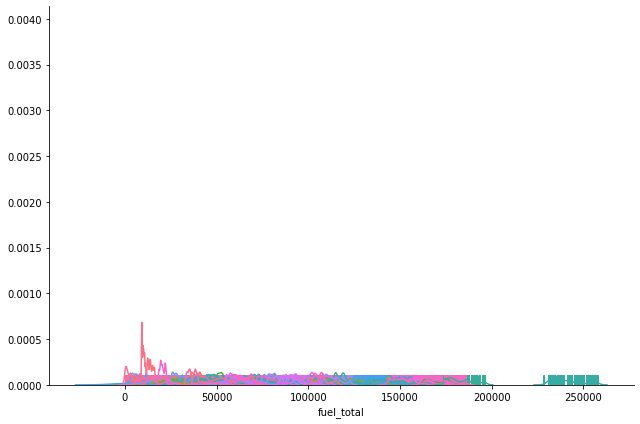

In [30]:
# Distribution of important features - plot

for i in ['fuel_total']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Right skewed plot

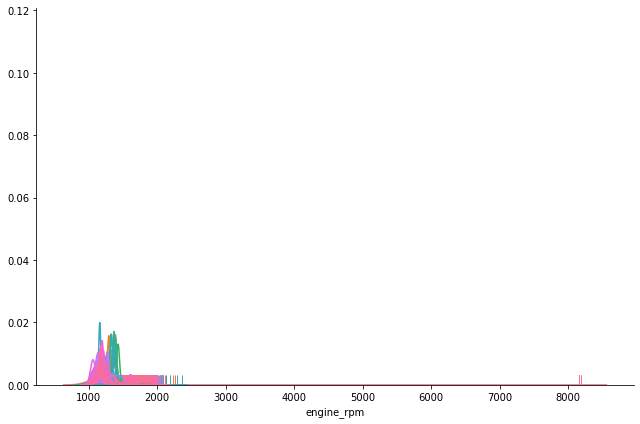

In [31]:
for i in ['engine_rpm']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Right skewed plot

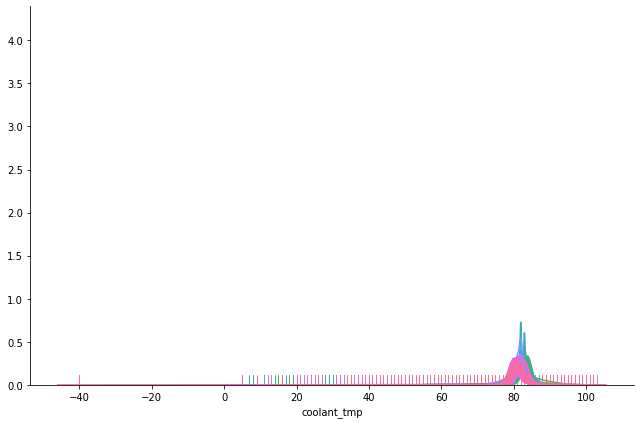

In [32]:
for i in ['coolant_tmp']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Left skewed plot

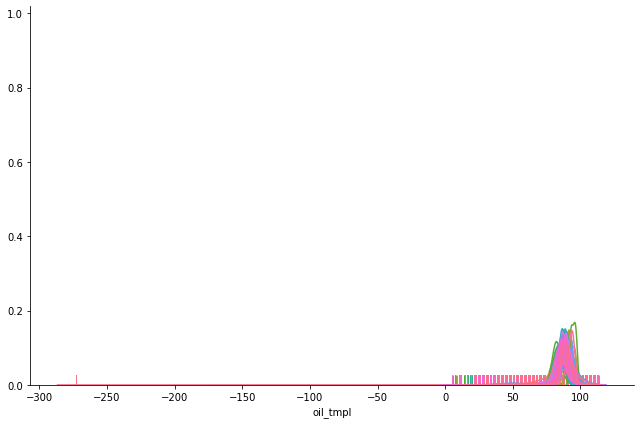

In [33]:
for i in ['oil_tmpl']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Left skewed plot

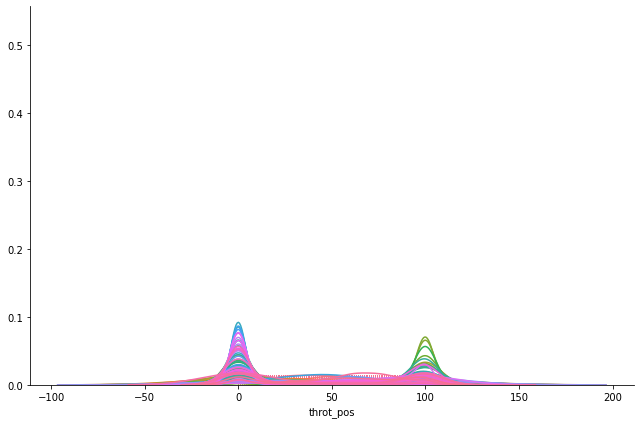

In [34]:
for i in ['throt_pos']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

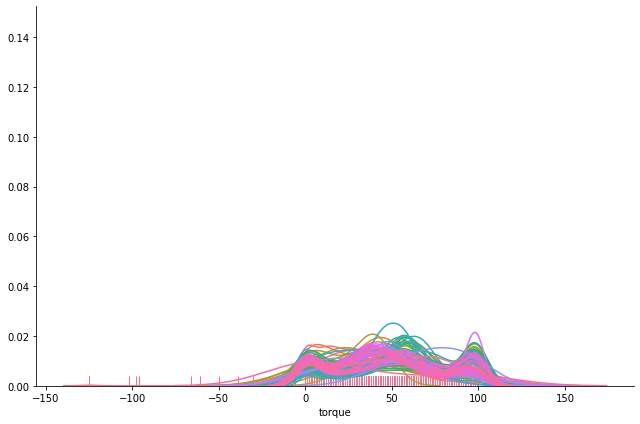

In [35]:
for i in ['torque']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

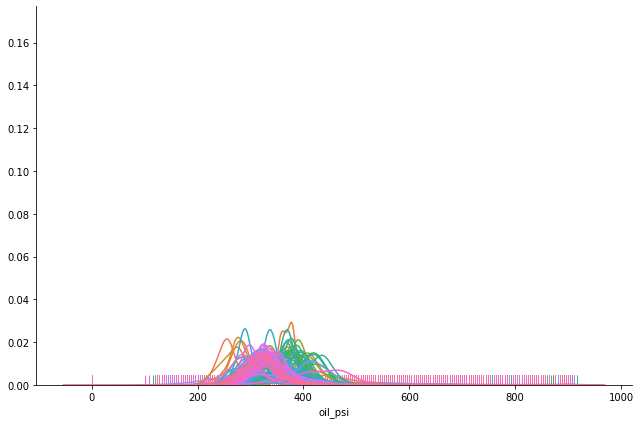

In [36]:
for i in ['oil_psi']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

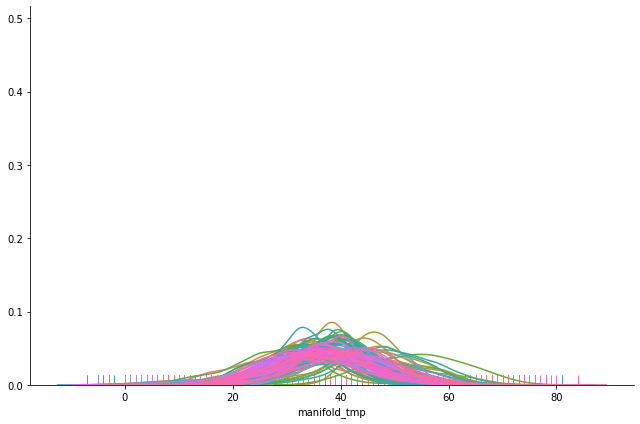

In [37]:
for i in ['manifold_tmp']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

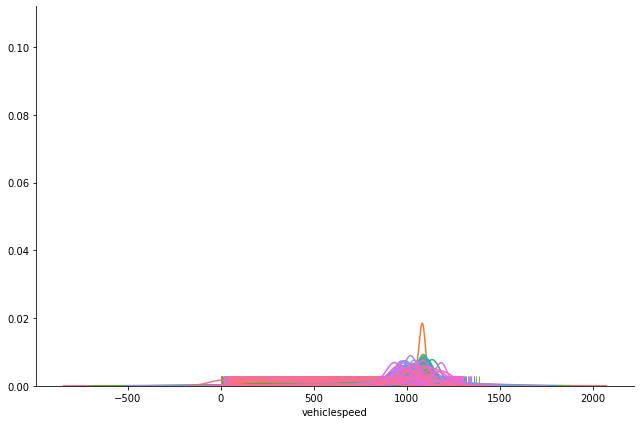

In [38]:
for i in ['vehiclespeed']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Left skewed plot

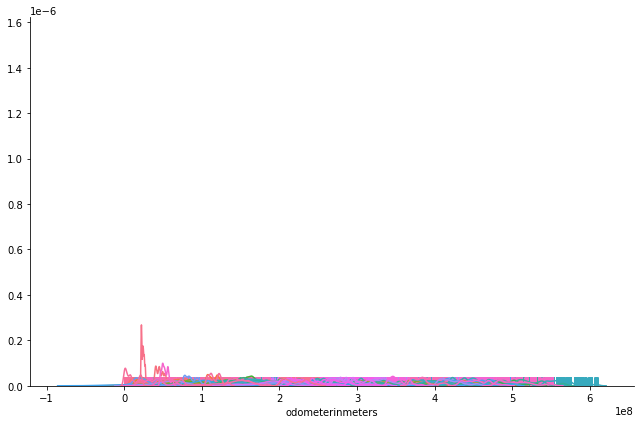

In [39]:
for i in ['odometerinmeters']:
    
    g = sns.FacetGrid(df_xirgo[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

Right skewed plot

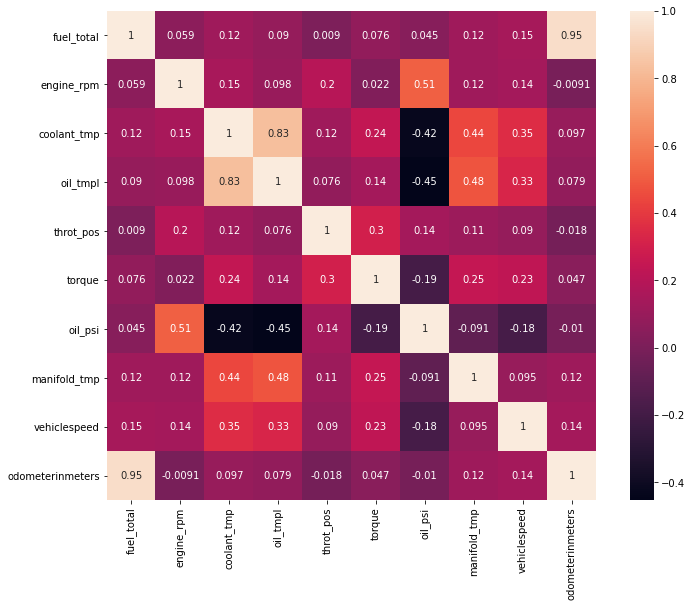

In [40]:
corrmat = df_xirgo.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=1, square=True, annot = True)
plt.show()

In [41]:
corrmat

,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
fuel_total,1.000000,0.059196,0.123325,0.089682,0.009028,0.075888,0.045446,0.124530,0.145805,0.945902
engine_rpm,0.059196,1.000000,0.151791,0.098110,0.202009,0.021925,0.513158,0.124394,0.141833,-0.009122
coolant_tmp,0.123325,0.151791,1.000000,0.831342,0.120744,0.240141,-0.424923,0.440825,0.354447,0.097230
oil_tmpl,0.089682,0.098110,0.831342,1.000000,0.075773,0.140496,-0.452596,0.478477,0.325415,0.078920
throt_pos,0.009028,0.202009,0.120744,0.075773,1.000000,0.301602,0.138822,0.109816,0.090133,-0.018057
torque,0.075888,0.021925,0.240141,0.140496,0.301602,1.000000,-0.187919,0.248835,0.233338,0.047378
oil_psi,0.045446,0.513158,-0.424923,-0.452596,0.138822,-0.187919,1.000000,-0.091435,-0.180792,-0.010419
manifold_tmp,0.124530,0.124394,0.440825,0.478477,0.109816,0.248835,-0.091435,1.000000,0.094540,0.118339
vehiclespeed,0.145805,0.141833,0.354447,0.325415,0.090133,0.233338,-0.180792,0.094540,1.000000,0.139108
odometerinmeters,0.945902,-0.009122,0.097230,0.078920,-0.018057,0.047378,-0.010419,0.118339,0.139108,1.000000


There is correlation between variables. To remove these correlation we need to do PCA.

# Dimensionality Reduction using PCA on multivariate timeseries data

https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4

In [42]:
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation

In [43]:
df_xirgo = df_xirgo.sort_values('msg_ts')
df_pca = df_xirgo
df_pca = df_pca.set_index(['msg_ts'])
df_pca

,vin,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
msg_ts,,,,,,,,,,,
2020-04-01 00:00:19,3HSDZTZR5LN134290,83536.0,1489.0,84.0,94.0,0.0,0.0,452.0,43.0,1106.0,265633380.0
2020-04-01 00:01:06,3HSDWTZR5LN844783,19870.0,1376.0,81.0,83.0,100.0,16.0,388.0,32.0,1094.0,284931580.0
2020-04-01 00:02:21,3HSDZTZR5LN134290,83536.0,1462.0,82.0,91.0,0.0,0.0,380.0,39.0,1038.0,265636940.0
2020-04-01 00:02:44,3HSDZTZR1LN125327,82402.0,1160.0,82.0,86.0,0.0,31.0,312.0,37.0,1098.0,240438540.0
2020-04-01 00:03:33,3HSDWTZR5LN845092,119822.0,1387.0,84.0,89.0,100.0,49.0,380.0,40.0,1110.0,357404480.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 18:02:50,3HSDZTZR2LN075067,73502.0,1087.0,79.0,88.0,32.0,22.0,304.0,53.0,103.0,277824300.0
2020-05-31 18:16:54,3HSDZTZR8KN398425,24661.0,1603.0,83.0,92.0,100.0,38.0,472.0,47.0,1196.0,63787140.0
2020-05-31 18:31:11,3HSDWTZR9LN810071,61931.0,1001.0,82.0,86.0,37.0,33.0,280.0,37.0,672.0,196080560.0


In [44]:
# list(df_xirgo['vin'].iloc[:1000])

In [45]:
df_pca = df_pca.drop(columns = ['vin'], axis=1)
df_pca

,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
msg_ts,,,,,,,,,,
2020-04-01 00:00:19,83536.0,1489.0,84.0,94.0,0.0,0.0,452.0,43.0,1106.0,265633380.0
2020-04-01 00:01:06,19870.0,1376.0,81.0,83.0,100.0,16.0,388.0,32.0,1094.0,284931580.0
2020-04-01 00:02:21,83536.0,1462.0,82.0,91.0,0.0,0.0,380.0,39.0,1038.0,265636940.0
2020-04-01 00:02:44,82402.0,1160.0,82.0,86.0,0.0,31.0,312.0,37.0,1098.0,240438540.0
2020-04-01 00:03:33,119822.0,1387.0,84.0,89.0,100.0,49.0,380.0,40.0,1110.0,357404480.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-31 18:02:50,73502.0,1087.0,79.0,88.0,32.0,22.0,304.0,53.0,103.0,277824300.0
2020-05-31 18:16:54,24661.0,1603.0,83.0,92.0,100.0,38.0,472.0,47.0,1196.0,63787140.0
2020-05-31 18:31:11,61931.0,1001.0,82.0,86.0,37.0,33.0,280.0,37.0,672.0,196080560.0


In [46]:
X = df_pca.values              # getting all values as a matrix of dataframe 
sc = StandardScaler()          # creating a StandardScaler object
X_std = sc.fit_transform(X)    # standardizing the data

In [47]:
X

array([[8.3536000e+04, 1.4890000e+03, 8.4000000e+01, ..., 4.3000000e+01,
        1.1060000e+03, 2.6563338e+08],
       [1.9870000e+04, 1.3760000e+03, 8.1000000e+01, ..., 3.2000000e+01,
        1.0940000e+03, 2.8493158e+08],
       [8.3536000e+04, 1.4620000e+03, 8.2000000e+01, ..., 3.9000000e+01,
        1.0380000e+03, 2.6563694e+08],
       ...,
       [6.1931000e+04, 1.0010000e+03, 8.2000000e+01, ..., 3.7000000e+01,
        6.7200000e+02, 1.9608056e+08],
       [5.3694000e+04, 1.1210000e+03, 9.0000000e+01, ..., 6.2000000e+01,
        1.1600000e+02, 1.8624904e+08],
       [5.3701000e+04, 1.0850000e+03, 8.1000000e+01, ..., 4.1000000e+01,
        9.5600000e+02, 1.8626208e+08]])

In [48]:
X_std

array([[ 0.0675104 ,  1.52452616,  0.63854912, ...,  0.61104633,
         0.59138057,  0.0734456 ],
       [-1.31526287,  0.81280511, -0.11343303, ..., -0.57032667,
         0.5416341 ,  0.21624347],
       [ 0.0675104 ,  1.35446892,  0.13722769, ...,  0.18145615,
         0.30948393,  0.07347195],
       ...,
       [-0.40173247, -1.54910101,  0.13722769, ..., -0.03333894,
        -1.20778329, -0.44121351],
       [-0.58063335, -0.79329105,  2.14251341, ...,  2.65159969,
        -3.51270289, -0.51396227],
       [-0.58048131, -1.02003404, -0.11343303, ...,  0.39625124,
        -0.03045026, -0.51386578]])

In [49]:
pca = PCA()
X_pca = pca.fit(X_std)

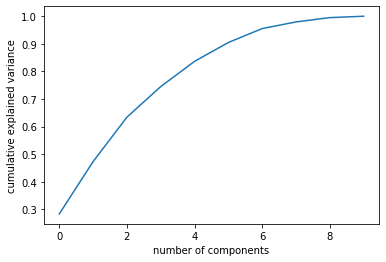

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [51]:
pca = PCA(n_components = 0.95)   # takes the variables required to explain 95 percent variance
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

7


In [52]:
pd.DataFrame(pca.components_, columns = df_pca.columns)

,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,-0.226406,-0.059395,-0.511264,-0.498764,-0.117049,-0.257392,0.286289,-0.358357,-0.311316,-0.218648
1,0.639661,0.165688,-0.168183,-0.196110,0.020867,-0.049190,0.312988,-0.034286,0.012579,0.628082
2,-0.170772,0.628706,0.041631,-0.007687,0.457120,0.165055,0.503220,0.159748,0.079632,-0.229087
3,0.024111,-0.341819,-0.205496,-0.286325,0.494949,0.669399,-0.173004,-0.155271,0.100882,0.032886
4,-0.034995,0.174632,0.018682,-0.030225,-0.128985,-0.082653,-0.046227,-0.577890,0.778307,-0.041148
5,-0.056413,0.097016,-0.178463,-0.210359,-0.668766,0.497012,0.128093,0.390929,0.208081,-0.067125
6,0.071688,0.378728,0.267395,0.102344,-0.241928,0.410024,-0.129340,-0.537528,-0.486716,0.015646


In [53]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important_variables = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_variable_names = df_pca.columns

# get the most important feature names
most_important_variables = [initial_variable_names[most_important_variables[i]] for i in range(n_pcs)]

In [54]:
most_important_variables

['coolant_tmp',
 'fuel_total',
 'engine_rpm',
 'torque',
 'vehiclespeed',
 'throt_pos',
 'manifold_tmp']

# K means Clustering

https://andrewm4894.com/2020/09/03/time-series-clustering-with-tslearn/

In [55]:
df_xirgo

,vin,msg_ts,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
156451,3HSDZTZR5LN134290,2020-04-01 00:00:19,83536.0,1489.0,84.0,94.0,0.0,0.0,452.0,43.0,1106.0,265633380.0
37260,3HSDWTZR5LN844783,2020-04-01 00:01:06,19870.0,1376.0,81.0,83.0,100.0,16.0,388.0,32.0,1094.0,284931580.0
156452,3HSDZTZR5LN134290,2020-04-01 00:02:21,83536.0,1462.0,82.0,91.0,0.0,0.0,380.0,39.0,1038.0,265636940.0
113667,3HSDZTZR1LN125327,2020-04-01 00:02:44,82402.0,1160.0,82.0,86.0,0.0,31.0,312.0,37.0,1098.0,240438540.0
39929,3HSDWTZR5LN845092,2020-04-01 00:03:33,119822.0,1387.0,84.0,89.0,100.0,49.0,380.0,40.0,1110.0,357404480.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120994,3HSDZTZR2LN075067,2020-05-31 18:02:50,73502.0,1087.0,79.0,88.0,32.0,22.0,304.0,53.0,103.0,277824300.0
194877,3HSDZTZR8KN398425,2020-05-31 18:16:54,24661.0,1603.0,83.0,92.0,100.0,38.0,472.0,47.0,1196.0,63787140.0
69600,3HSDWTZR9LN810071,2020-05-31 18:31:11,61931.0,1001.0,82.0,86.0,37.0,33.0,280.0,37.0,672.0,196080560.0
99767,3HSDZTZR0LN384388,2020-05-31 20:02:05,53694.0,1121.0,90.0,92.0,18.0,8.0,320.0,62.0,116.0,186249040.0


In [56]:
# df_xirgo['vin'].value_counts()

In [57]:
!pip install tslearn

     |████████████████████████████████| 798kB 5.2MB/s 


In [58]:
# Function for Clustering the columns for each VIN

def df_clustering(df = df_xirgo, 
                  columns_list = ['msg_ts','coolant_tmp', 'fuel_total', 'engine_rpm', 'torque', 'vehiclespeed', 'throt_pos', 'manifold_tmp'],
                  time_col = 'msg_ts', 
                  start_date = "2020-04-01", 
                  end_date = "2020-05-30",
                  n_clusters = 5):
  
  from tslearn.clustering import TimeSeriesKMeans
  from tslearn.preprocessing import TimeSeriesScalerMeanVariance
  
  df_out = pd.DataFrame({"vin": [], "variable" : [], "cluster": []})
  
  counter2 = 0

  for vin in df['vin'].unique():

    df_vin = df[df['vin'] == vin]                        #dataframe for single vin
    df_vin.drop(['vin'], axis = 1, inplace = True)

    df_vin_imp = pd.DataFrame(df_vin, columns = columns_list)   #dataframe with important columns

    df_vin_imp.set_index(pd.to_datetime(df_vin[time_col], unit='s'), drop = True, inplace = True)
    df_vin_imp.sort_index(ascending= True, inplace = True)
    df_vin_imp.drop(columns = [time_col],axis=1, inplace = True)

    after_start_date = df_vin_imp.index >= start_date
    before_end_date = df_vin_imp.index  < end_date
    between_two_dates = after_start_date & before_end_date         #the start and end date

    df_vin_imp_dates = df_vin_imp.loc[between_two_dates]           #dataframe for the selected period of dates

    if df_vin_imp_dates.shape[0] < 100:                           #if datapoints less than 100, increase counter by 1
      # print("{} has only {} datapoints in this time period".format(vin,df_vin_imp_dates.shape[0]))
      counter2 += 1

    df_vin_imp_dates = (df_vin_imp_dates-df_vin_imp_dates.min())/(df_vin_imp_dates.max()-df_vin_imp_dates.min())   #Min Max scaling

    X = df_vin_imp_dates.transpose().values
    
    counter = 1

    while True:
      try: 
        X = TimeSeriesScalerMeanVariance().fit_transform(X)       
        break
      except:
        counter = 0
        break

    if counter == 1:
      while True:
        try:
          df_kmeans = pd.DataFrame(X.reshape(df_vin_imp_dates.shape), columns=df_vin_imp_dates.columns, index=df_vin_imp_dates.index)
          break
        
        except:
          counter = 0
          break
      
    if counter == 1:  
      try:
        model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=100, n_init=2).fit(X)

        df_cluster = pd.DataFrame(list(zip(df_kmeans.columns, model.labels_)), columns=['variable', 'cluster'])

        cluster_metrics_dict = df_cluster.groupby(['cluster'])['variable'].apply(lambda x: [x for x in x]).to_dict() #groupby and create dictionary 
        
        cluster_len_dict = df_cluster['cluster'].value_counts().to_dict()
         #if only one value in dictionary, ie key alone means no cluster assigned, drop value
        clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1] 
        clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
        clusters_final.sort()

        df_cluster['vin'] = vin

        df_out = df_out.append(df_cluster, ignore_index= True)

      except:
        None                                                                                                  

    else:
      None
      # print("{} VIN have no recorded values from {} to {}".format(vin,start_date, end_date))
    

  print("Total No. of VINS present : {}".format(df_out['vin'].nunique()))
  print("No. of VINS with datapoints less than 100 : {} ".format(counter2))
  print()

  dups = df_out[df_out.duplicated(['vin','cluster'], keep = False)].sort_values(['vin', 'cluster'])  #only selecting clusterswhich are duplicated for a vin

  return df_out , dups


In [59]:
# Function for giving number of Vins with selected variables in same cluster

def num_vins(var1 , var2, df):
  df_final = pd.DataFrame({"vin": [], "variable" : [], "cluster": []})

  for vin in df['vin'].unique():
    df_final = df_final.append(df[(df['vin'] == vin) & (df['variable'].isin ([var1, var2]))])  #condition, vin, var1 & var2 as var1 & var2 passed


  df_final = df_final[df_final.duplicated(['vin','cluster'], keep = False)].sort_values(['vin', 'cluster'])  #keeping only duplicated

  return df_final['vin'].nunique()


#Looping the above function for all variables

def vins_with_var_in_same_cluster(df, time_period):
  df_vins_number = pd.DataFrame({"Variable1": [], "Variable2" : [], time_period: []})
  for i in range(len(df['variable'].unique())):
      for j in range(len(df['variable'].unique())):
          out2 = num_vins(df['variable'].unique()[i],df['variable'].unique()[j], df)
          df_vins_number = df_vins_number.append(pd.DataFrame({"Variable1": [df['variable'].unique()[i]], 
                                                               "Variable2" : [df['variable'].unique()[j]], 
                                                               time_period: [out2]}), ignore_index= True )
  
  df_vins_number = df_vins_number[df_vins_number['Variable1'] != df_vins_number['Variable2']]  #dropping if var1 = var2

  df_vins_number.sort_values(['Variable1', 'Variable2'], ascending = [True, True], inplace = True)
  
  df_vins_number.reset_index(inplace = True, drop = True)

  return df_vins_number


In [60]:
time_period = 'Week1'
start_date = "2020-04-01"
end_date = "2020-04-08"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly = df_vins_number

Total No. of VINS present : 83
No. of VINS with datapoints less than 100 : 19 



In [61]:
time_period = 'Week2'
start_date = "2020-04-08"
end_date = "2020-04-15"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 85
No. of VINS with datapoints less than 100 : 21 



In [62]:
time_period = 'Week3'
start_date = "2020-04-15"
end_date = "2020-04-22"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 83
No. of VINS with datapoints less than 100 : 19 



In [63]:
time_period = 'Week4'
start_date = "2020-04-22"
end_date = "2020-04-29"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 88
No. of VINS with datapoints less than 100 : 26 



In [64]:
time_period = 'Week5'
start_date = "2020-04-29"
end_date = "2020-05-06"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 81
No. of VINS with datapoints less than 100 : 23 



In [65]:
time_period = 'Week6'
start_date = "2020-05-06"
end_date = "2020-05-13"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 85
No. of VINS with datapoints less than 100 : 35 



In [66]:
time_period = 'Week7'
start_date = "2020-05-13"
end_date = "2020-05-20"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period])

Total No. of VINS present : 89
No. of VINS with datapoints less than 100 : 75 



In [67]:
time_period = 'Week8'
start_date = "2020-05-20"
end_date = "2020-05-27"

df_out, dups = df_clustering(start_date = start_date , end_date = end_date)

df_vins_number = vins_with_var_in_same_cluster(dups,time_period)

df_weekly[time_period] = list(df_vins_number[time_period]) 

Total No. of VINS present : 85
No. of VINS with datapoints less than 100 : 52 



**No. of VINS with variable1 and variable2 in same cluster**

In [68]:
df_weekly  

,Variable1,Variable2,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8
0,coolant_tmp,engine_rpm,2.0,1.0,2.0,9.0,0.0,5.0,8.0,15.0
1,coolant_tmp,fuel_total,2.0,1.0,0.0,3.0,0.0,1.0,2.0,2.0
2,coolant_tmp,manifold_tmp,20.0,18.0,18.0,30.0,22.0,26.0,27.0,29.0
3,coolant_tmp,throt_pos,2.0,0.0,1.0,3.0,1.0,4.0,2.0,9.0
4,coolant_tmp,torque,1.0,0.0,1.0,5.0,1.0,1.0,3.0,4.0
5,coolant_tmp,vehiclespeed,13.0,11.0,12.0,15.0,6.0,14.0,20.0,16.0
6,engine_rpm,coolant_tmp,2.0,1.0,2.0,9.0,0.0,5.0,8.0,15.0
7,engine_rpm,fuel_total,1.0,1.0,0.0,6.0,0.0,1.0,0.0,4.0
8,engine_rpm,manifold_tmp,5.0,10.0,14.0,13.0,4.0,9.0,9.0,8.0
9,engine_rpm,throt_pos,28.0,27.0,24.0,25.0,24.0,23.0,22.0,25.0
